In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Cargar los datos desde un archivo CSV (ajusta el nombre del archivo y las columnas)
df = pd.read_csv("cleaned_data.csv")
df.head()

,sg,albumin,rbc_level,haemoglobin,wbc_count,outcome,sodium,creatnine
0,0.336943,-0.731127,-1.12601,0.929121,1.646606,1,-1.949433,-0.355527
1,0.352859,-0.731127,0.42871,0.669784,1.646606,0,0.579098,-0.355527
2,0.352859,0.771052,1.98343,-1.664249,0.000000,1,0.507871,0.323924
3,0.321026,0.019963,-1.12601,-0.108227,-0.174980,1,0.418839,-0.355527
4,0.321026,0.771052,0.42871,0.000000,-0.174980,1,0.596904,0.323924


c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

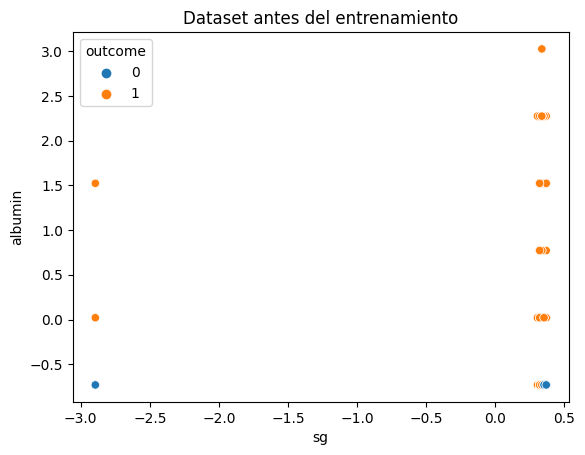

In [9]:
sns.scatterplot(x='sg', y='albumin', hue='outcome', data=df)
plt.title('Dataset antes del entrenamiento')
plt.show()

c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

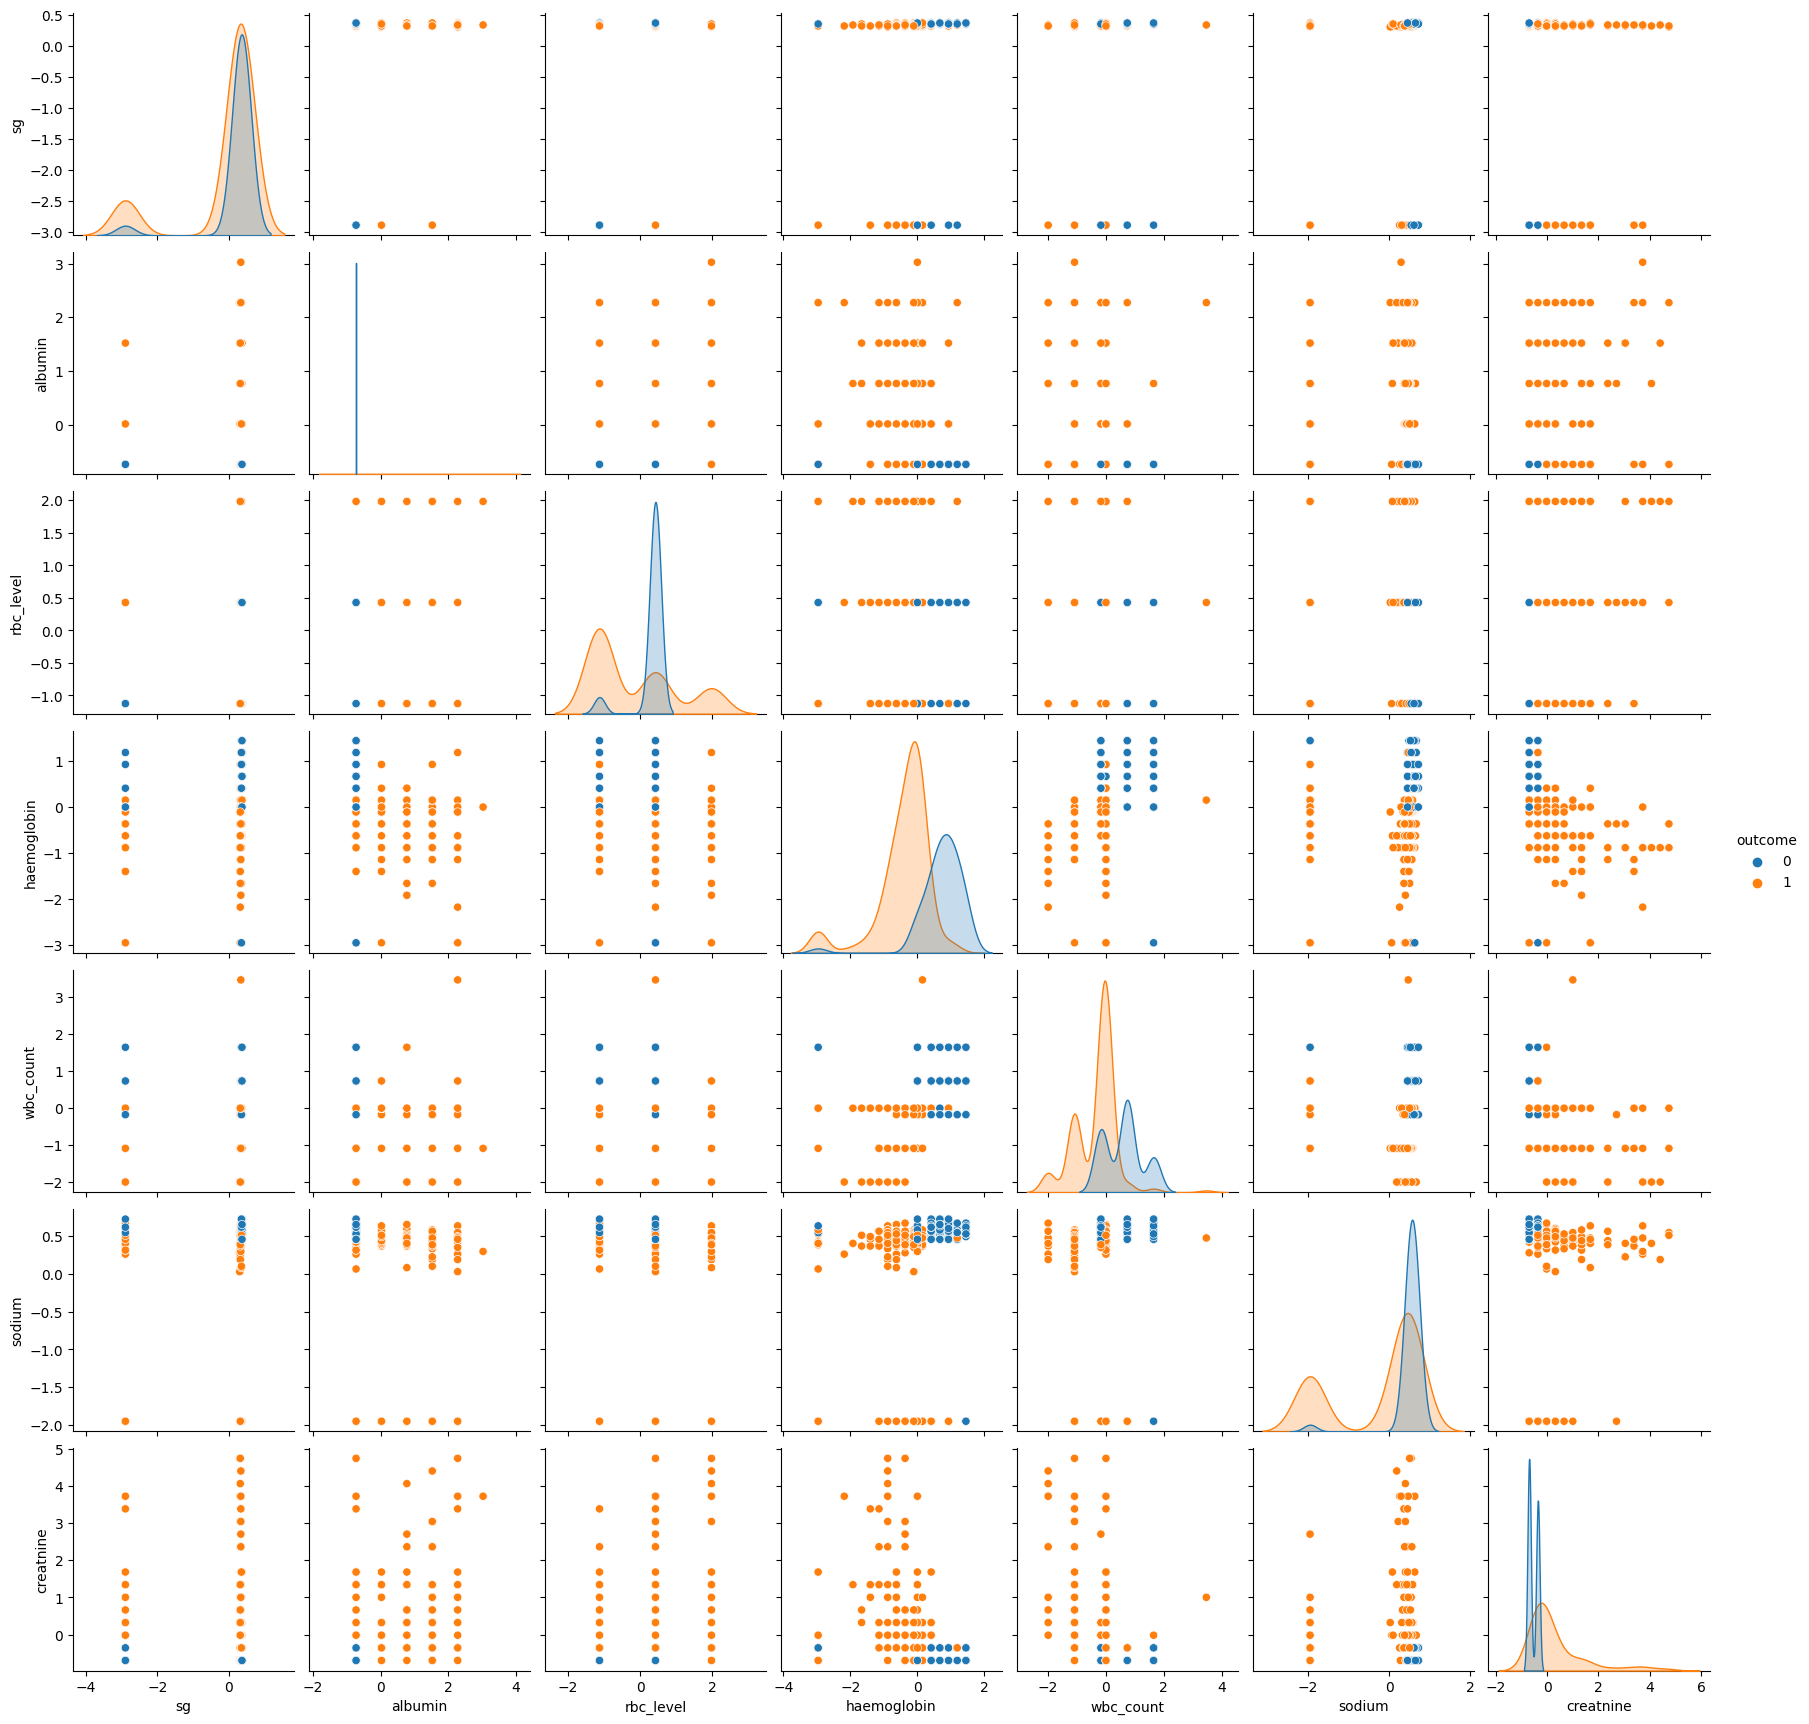

In [10]:
# Crear una matriz de dispersión
sns.pairplot(df, hue='outcome')
plt.show()

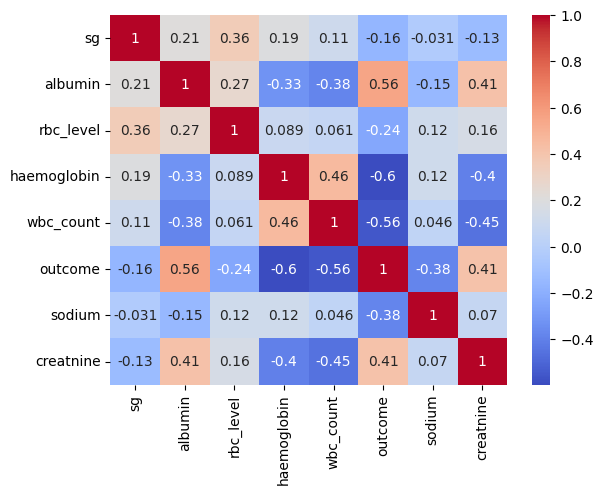

In [11]:
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [50]:
# Definir las características (features) y la variable objetivo
X = df.drop(columns=['outcome'])  # Excluye la columna 'outcome'
Y = df['outcome']

# Dividir los datos en conjuntos de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear y entrenar un modelo MLP para cada característica
models = {}
for column in x_train.columns:
    mlp = MLPClassifier(hidden_layer_sizes=(75,), activation='tanh', solver='adam', alpha=0.0001, max_iter=250, learning_rate="adaptive")
    mlp.fit(x_train[[column]], y_train)  # Entrenar el modelo solo con una característica
    models[column] = mlp

# Evaluar el rendimiento de cada modelo en el conjunto de validación
accuracy_scores = {}
for column, model in models.items():
    accuracy = model.score(x_val[[column]], y_val)
    accuracy_scores[column] = accuracy
    print(f"Validation Set Accuracy for {column}: {accuracy}")

# Puedes usar los modelos para hacer predicciones individuales por característica
# Por ejemplo, para predecir la clase de la característica 'sg':
# prediction_sg = models['sg'].predict(x_val[['sg']])

Validation Set Accuracy for sg: 0.6373626373626373
Validation Set Accuracy for albumin: 0.7692307692307693
Validation Set Accuracy for rbc_level: 0.5054945054945055
Validation Set Accuracy for haemoglobin: 0.9120879120879121
Validation Set Accuracy for wbc_count: 0.8571428571428571
Validation Set Accuracy for sodium: 0.6703296703296703
Validation Set Accuracy for creatnine: 0.7252747252747253


c:\Users\josea\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


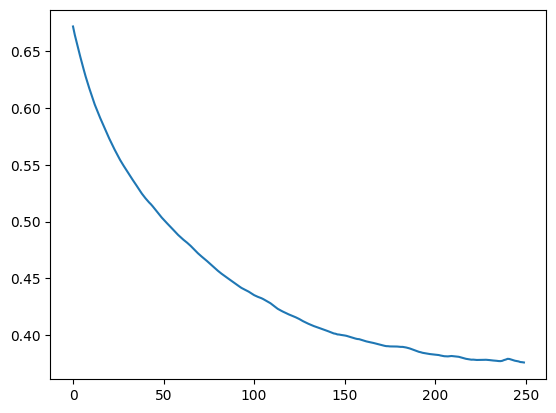

In [51]:
import matplotlib.pyplot as plt

plt.plot(mlp.loss_curve_)
plt.show()

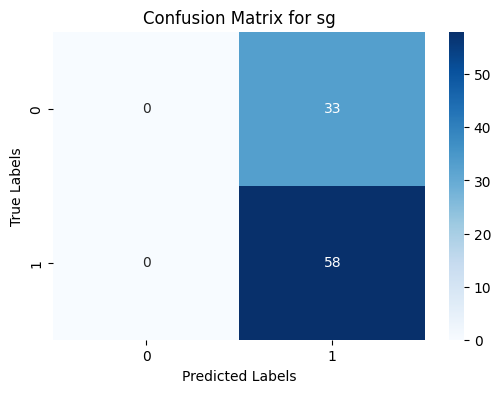

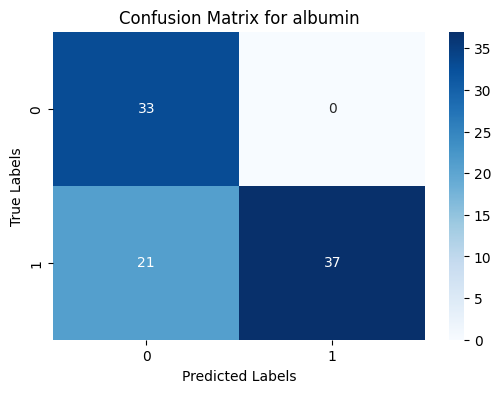

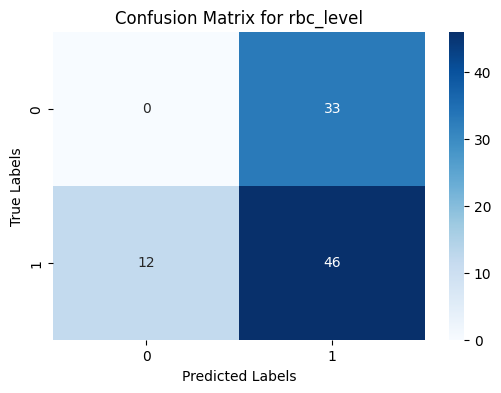

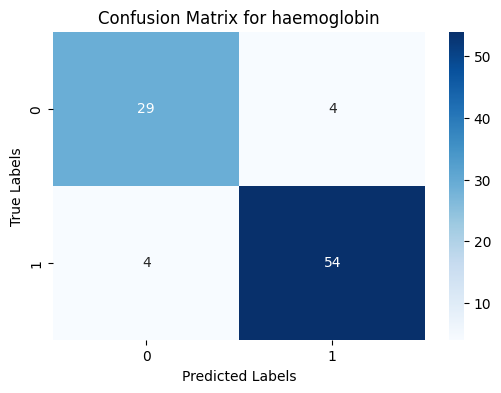

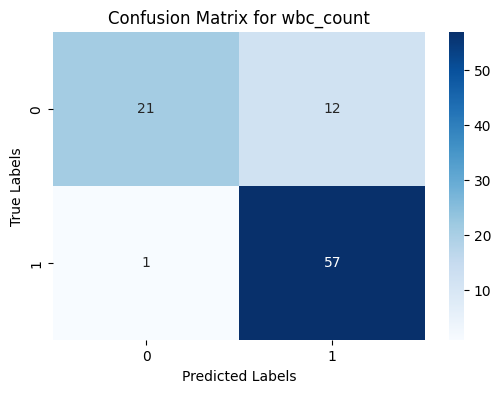

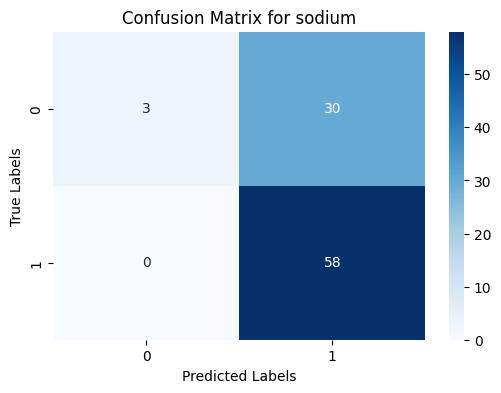

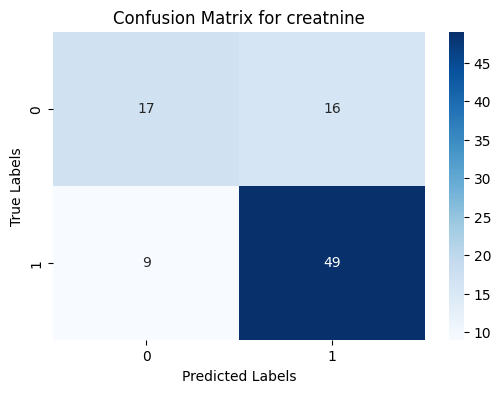

In [53]:
for column, model in models.items():
    predictions = model.predict(x_val[[column]])
    confusion = confusion_matrix(y_val, predictions)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix for {column}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

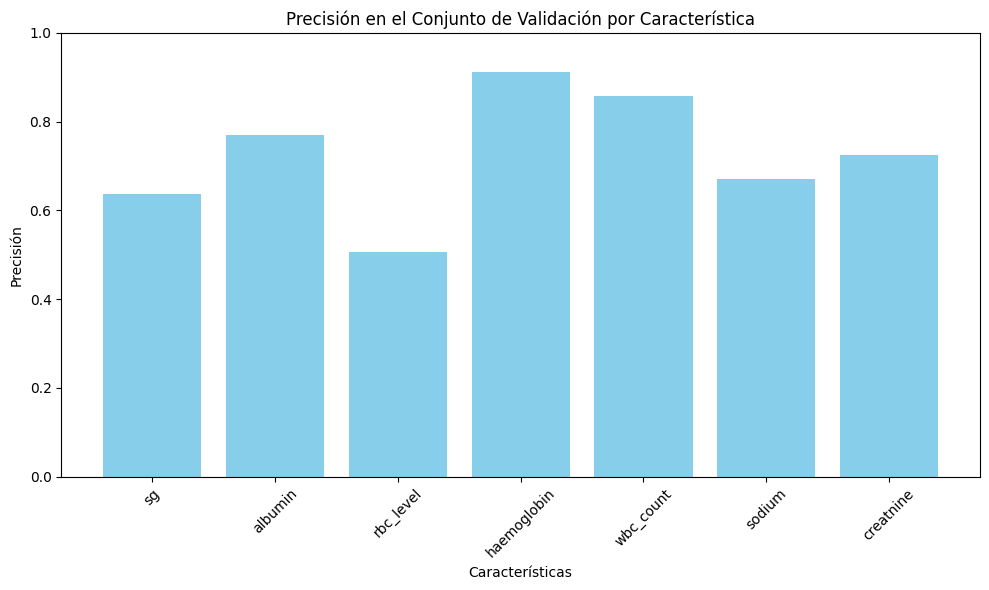

In [54]:
columns = list(models.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(columns, accuracies, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Precisión')
plt.title('Precisión en el Conjunto de Validación por Característica')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Establece el rango del eje y de 0 a 1 para la precisión
plt.tight_layout()
plt.show()